# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# 1. Read the dataset given in file named 'bigcity.csv'.

In [1]:
import pandas as pd

data = pd.read_csv('bigcity.csv')
data.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


# 2. Transform the dataset (0.5 points)
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [3]:
rows = data.shape[0]
print("No.of rows: %d" %(rows))

X = data.u  
Y = data.x 
X = X.values.reshape(len(X),1) #reshaping for making it comply with 2D
Y = Y.values.reshape(len(Y),1)

No.of rows: 49


# 3. Check the dataset for any missing values and also print out the correlation matrix (0.5 points)
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [4]:
data.isna().sum()

Unnamed: 0    0
u             0
x             0
dtype: int64

In [5]:
data.corr()

,Unnamed: 0,u,x
Unnamed: 0,1.000000,-0.024788,-0.047890
u,-0.024788,1.000000,0.981742
x,-0.047890,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 4. Split data into train, test sets (0.5 points)
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

# 5. Find coefficients & intercept (0.5 points)
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [8]:
from sklearn.linear_model import LinearRegression
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

# Let us explore the coefficients for each of the independent attributes

b1 = regression_model.coef_
b0 = regression_model.intercept_
print("b1 is: {} and b0 is: {}".format(b1, b0))

b1 is: [[1.15945123]] and b0 is: [9.71845532]


# 6.  Linear Relationship between feature and target (0.5 points)
Plot the line with b1 and b0 as slope and y-intercept.

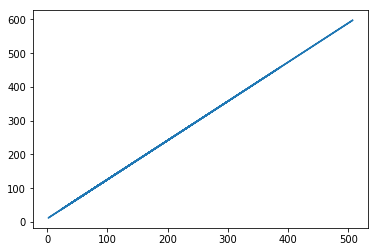

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(X_train,b1*X_train+b0)

# 7. Evaluation of model with scikit-learn (0.5 points)
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [ ]:
y_pred = regression_model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
mse = mean_squared_error(y_test, y_pred)
rms = sqrt(mse)
r2Score = r2_score(y_test, y_pred)
print("The Root Mean Sq Error is {} and R^2 error is {}".format(rms,r2Score))

# 8. Calculate the accuracy of the model for both training and test data set (0.5 points)

Hint: .score() function

In [11]:
regression_model.score(X_train,y_train)

0.9682175540860046

In [12]:
regression_model.score(X_test,y_test)

0.9181922560396981

# Exploring and Understanding Data (EDA)

# 1. Load required libraries

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

# 2. Collect and load data

In [4]:
df = pd.read_csv('usedcars.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
year            150 non-null int64
model           150 non-null object
price           150 non-null int64
mileage         150 non-null int64
color           150 non-null object
transmission    150 non-null object
dtypes: int64(3), object(3)
memory usage: 7.1+ KB


# 3. Explore numeric variables - five number summary

In [6]:
#Measuring the central tendency – mean and median
#Measuring spread – quartiles and the fve-number summary
df.describe()

,year,price,mileage
count,150.000000,150.000000,150.000000
mean,2008.726667,12961.933333,44260.646667
std,2.200966,3122.481735,26982.104322
min,2000.000000,3800.000000,4867.000000
25%,2008.000000,10995.000000,27200.250000
50%,2009.000000,13591.500000,36385.000000
75%,2010.000000,14904.500000,55124.500000
max,2012.000000,21992.000000,151479.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

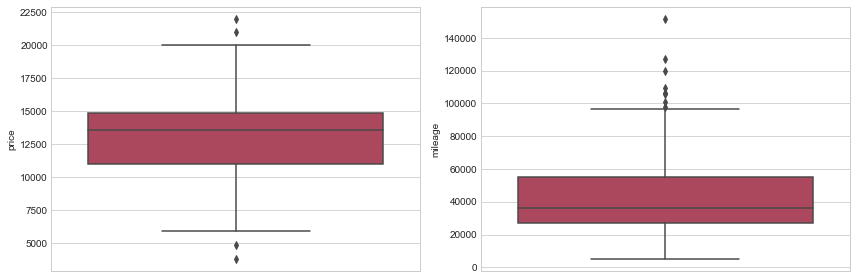

In [8]:
#Visualizing numeric variables – boxplots
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
sns.boxplot(y='price',data=df,palette='inferno')
plt.subplot(1, 2, 2)
sns.boxplot(y='mileage',data=df,palette='inferno')
plt.tight_layout()

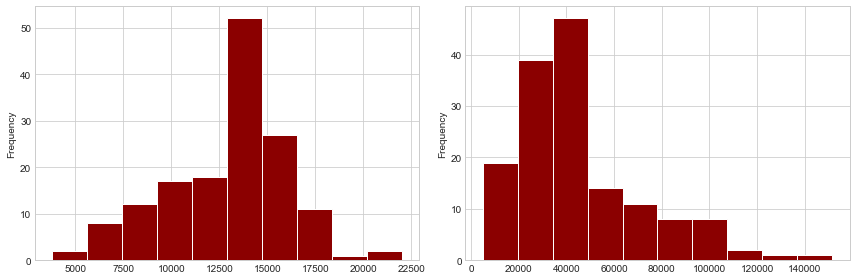

In [9]:
#Visualizing numeric variables – histograms
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
df['price'].plot.hist(bins=10,color='darkred',edgecolor='white')
plt.subplot(1, 2, 2)
df['mileage'].plot.hist(bins=10,color='darkred',edgecolor='white')
plt.tight_layout()

In [10]:
#Measuring spread – variance and standard deviation
price_mean = df['price'].mean()
price_std  = df['price'].std()
price_var  = df['price'].var()
mileage_mean = df['mileage'].mean()
mileage_std  = df['mileage'].std()
mileage_var  = df['mileage'].var()

print('mean price: '+str(round(price_mean,2)))
print('std price: '+str(round(price_std,2)))
print('var price: '+str(round(price_var,2)))
print('\n')
print('mean mileage: '+str(round(mileage_mean,2)))
print('std mileage: '+str(round(mileage_std,2)))
print('var mileage: '+str(round(mileage_var,2)))

mean price: 12961.93
std price: 3122.48
var price: 9749892.18


mean mileage: 44260.65
std mileage: 26982.1
var mileage: 728033953.64


# 4. Explore categorical variables

In [11]:
#Measuring the central tendency – the mode
df.select_dtypes(include=['object']).describe()

,model,color,transmission
count,150,150,150
unique,3,9,2
top,SE,Black,AUTO
freq,78,35,128


# 5. Explore relationships between variables using scatterplots and two-way cross tabulations

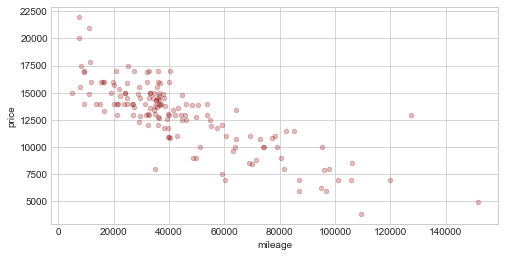

In [12]:
#Visualizing relationships – scatterplots
df.plot.scatter(y='price',x='mileage',color='darkred',alpha=0.25,figsize=(8,4))

In [13]:
#Examining relationships – two-way cross-tabulations
df['conservative'] = df['color'].apply(lambda x: 'YES' if x in ["Black", "Gray", "Silver", "White"] else 'NO')
temp = df.pivot_table(values='year', index=['model'], columns=['conservative'], aggfunc='count')
temp


conservative,NO,YES
model,,
SE,27,51
SEL,7,16
SES,17,32
